# Make Hexbins for Case Studies

In [69]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


Test out for a day to get an idea of what the data looks like

In [99]:
# change state abbreviation according to needs
state = 'CO'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 100 to 57293
Data columns (total 38 columns):
coordinates                   0 non-null object
created_at                    1454 non-null object
hashtags                      231 non-null object
media                         62 non-null object
urls                          323 non-null object
favorite_count                1454 non-null object
id                            1454 non-null object
in_reply_to_screen_name       99 non-null object
in_reply_to_status_id         89 non-null float64
in_reply_to_user_id           99 non-null float64
lang                          1454 non-null object
place                         5 non-null object
possibly_sensitive            360 non-null object
retweet_count                 1454 non-null object
retweet_id                    1128 non-null float64
retweet_screen_name           1128 non-null object
source                        1454 non-null object
text                          1454 no

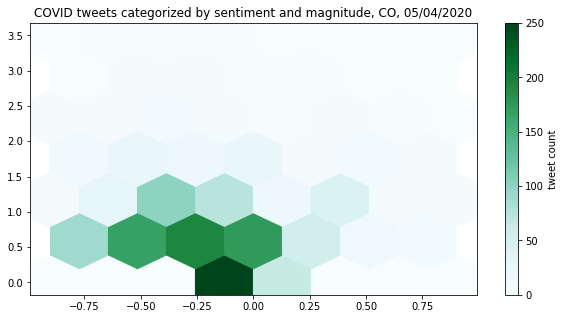

In [105]:
day = "05"
path_sentiment_tweets = './../nlp/covid_sentiment_daily_04_{}.csv'.format(day)

sentiment_covid = pd.read_csv(path_sentiment_tweets, engine='python')
sentiment_covid = sentiment_covid[sentiment_covid['state']==state]
sentiment_covid.info()
    

plt.close('all')
fig = plt.figure(figsize=(10,5))
hb = plt.hexbin(y=sentiment_covid['magnitude'], x=sentiment_covid['sentiment'], gridsize = (7,3),vmin=0, vmax=250, cmap = 'BuGn')
plt.title("COVID tweets categorized by sentiment and magnitude, {}, {}/04/2020".format(state,day))
cb = fig.colorbar(hb)
cb.set_label('tweet count')
plt.show()

### The cell below will loop through each day of april and make a hexbin for each day, saving the figure to the current directory

n_name           863 non-null object
source                        1188 non-null object
text                          1188 non-null object
tweet_url                     1188 non-null object
user_created_at               1188 non-null object
user_screen_name              1188 non-null object
user_default_profile_image    1188 non-null bool
user_description              1088 non-null object
user_favourites_count         1188 non-null float64
user_followers_count          1188 non-null float64
user_friends_count            1188 non-null float64
user_listed_count             1188 non-null float64
user_location                 1188 non-null object
user_name                     1188 non-null object
user_screen_name.1            1188 non-null object
user_statuses_count           1188 non-null float64
user_time_zone                0 non-null float64
user_urls                     329 non-null object
user_verified                 1188 non-null bool
is_state                      1188 non-null boo

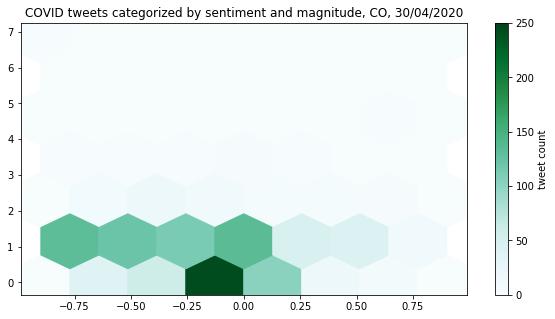

In [111]:
for day in range(1,31): #loops through the code for each day in april
    if day<10:
        day = "0{}".format(day)

    path_sentiment_tweets = './../nlp/covid_sentiment_daily_04_{}.csv'.format(day)

    sentiment_covid = pd.read_csv(path_sentiment_tweets, engine='python')
    sentiment_covid = sentiment_covid[sentiment_covid['state']==state]
    sentiment_covid.info()
        

    plt.close('all') #deletes previous figure
    fig = plt.figure(figsize=(10,5))
    hb = plt.hexbin(y=sentiment_covid['magnitude'], x=sentiment_covid['sentiment'], gridsize = (7,3),vmin=0, vmax=250, cmap = 'BuGn')
    plt.title("COVID tweets categorized by sentiment and magnitude, {}, {}/04/2020".format(state,day))
    cb = fig.colorbar(hb)
    cb.set_label('tweet count')
    plt.savefig('{}_hexbin_sentiment_{}'.format(state, day)) #saves the figure

_______________________________________________________________________________________________________

# Making a GIF
The code was based off what was found on:
https://medium.com/swlh/python-animated-images-6a85b9b68f86

* This creates an animated visualization showing the change of the hexbin over time for each state


In [89]:
# installing necessary libraries
! pip install imageio
! pip install imageio-ffmpeg
! pip install pygifsicle

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\joyji\Anaconda3\python.exe -m pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\joyji\Anaconda3\python.exe -m pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\joyji\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [112]:
import imageio
from pathlib import Path
image_path = Path('colorado_hexbin')
images = list(image_path.glob('*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))


In [113]:
imageio.mimwrite('colorado_hexbin_animated.gif', image_list, fps=2)

_________________________________________________________________________________________________________